## binarsity results visualisation

All calculations are processed on a HPC2 Cluster. Choose the `filename` to edit the corresponding results and save it as .html file.

In [1]:
# -*- coding: utf-8 -*-
%reset -f
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import pylab as pl
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score, roc_curve
from mlpp.preprocessing import FeaturesBinarizer

## Visualize data

In [2]:
filename = 'higgs'
os.chdir('./datasets/%s' % filename)
data_folder = os.path.expanduser("~/Dev/datasets_binarsity/")
# otherwise our dropbox is full
df = pd.read_csv(data_folder + "%s/%s" % (filename, filename))

# continuous features only
to_be_dropped = []
for i in range(df.shape[1]):
    feature_type = FeaturesBinarizer._detect_feature_type(df.ix[:,i])
    if feature_type == 'discrete':
        to_be_dropped.append(i)
df = df.drop(df.columns[to_be_dropped], axis=1)

print(df.shape)
df.head()

(4, 24)


,0.907542109489,0.329147279263,0.359411865473,1.4979698658,-0.313009530306,1.09553062916,-0.55752491951,-1.58822977543,0.812581181526,-0.213641926646,...,0.398700892925,-1.13893008232,-0.000819110195152,0.302219897509,0.833048164845,0.985699653625,0.978098392487,0.779732167721,0.992355763912,0.798342585564
0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.851737,1.540659,...,1.256955,1.128848,0.900461,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
1,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,2.423265,-0.676016,...,0.745313,-0.678379,-1.360356,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
2,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.800872,1.020974,...,0.479999,-0.373566,0.113041,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
3,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,0.755421,0.643110,...,0.651114,-0.654227,-1.274345,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


### Convergence check (objective must be decreasing)

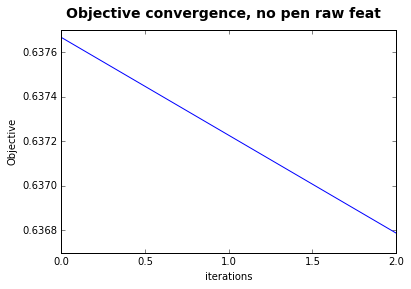

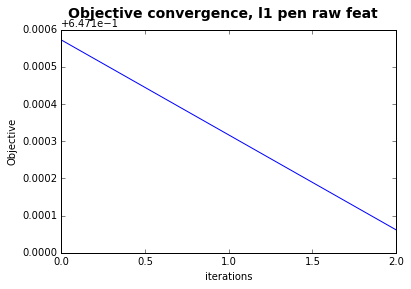

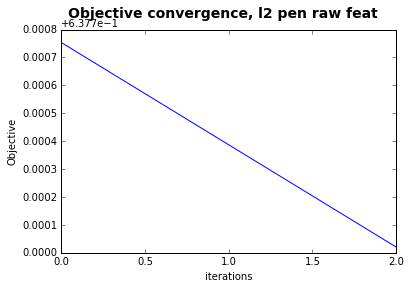

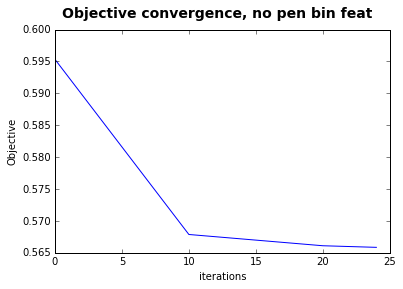

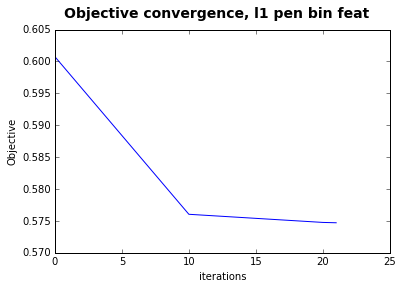

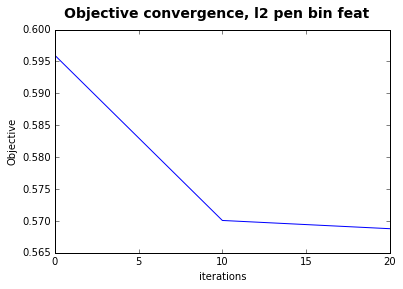

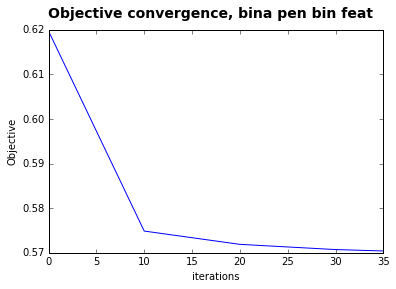

In [3]:
for fname in os.listdir('./results/cvg'):
    if fname[0] != '.':
        cvg = np.load('./results/cvg/' + str(fname))
        n_iter = cvg[:, 0]
        obj = cvg[:, 1]
        fname = fname.split('.')[0].split('-')[1].replace('_',' ')
        fig = pl.figure()
        pl.suptitle("Objective convergence, %s" % fname,
                    fontsize=14, fontweight='bold')
        pl.xlabel('iterations')
        pl.ylabel('Objective')
        pl.plot(n_iter, obj, '-b')
        pl.show()

### Beta coefficients

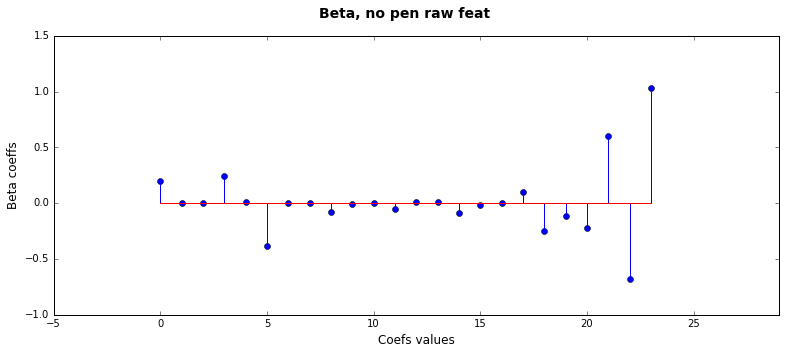

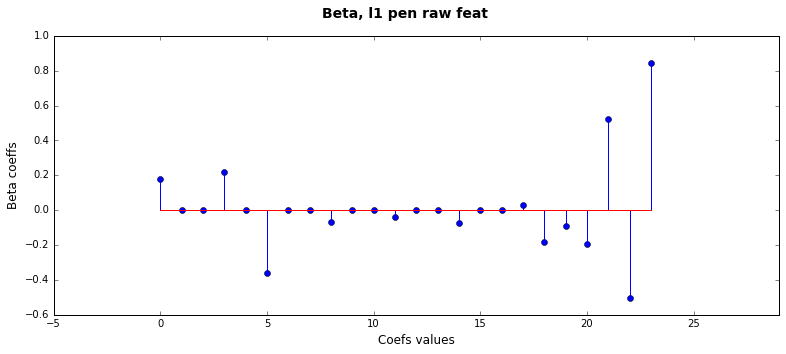

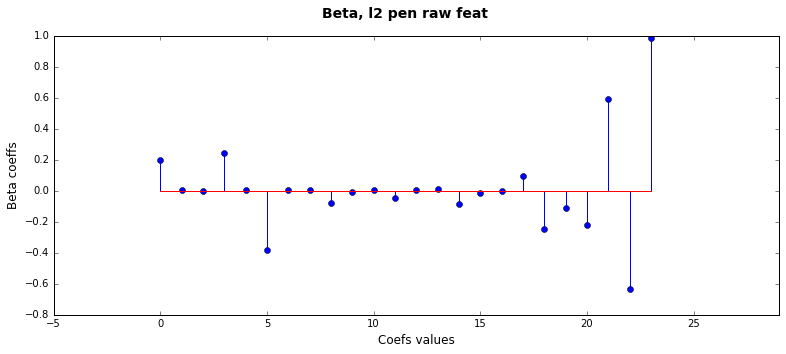

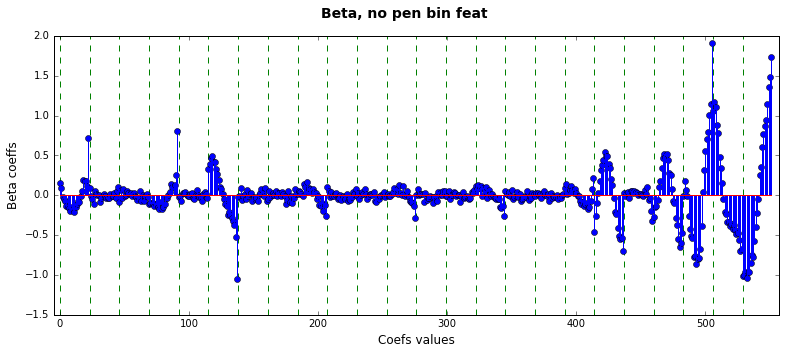

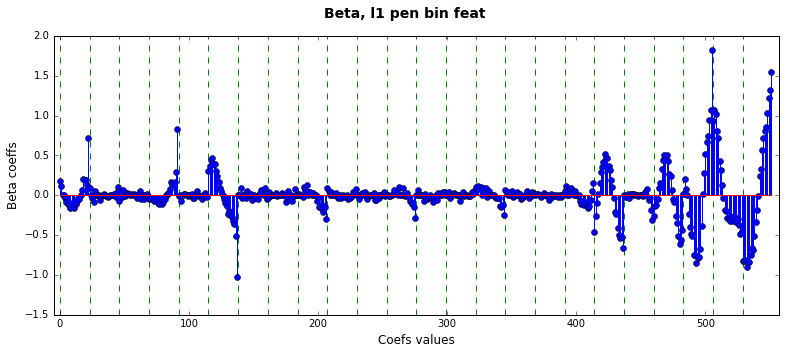

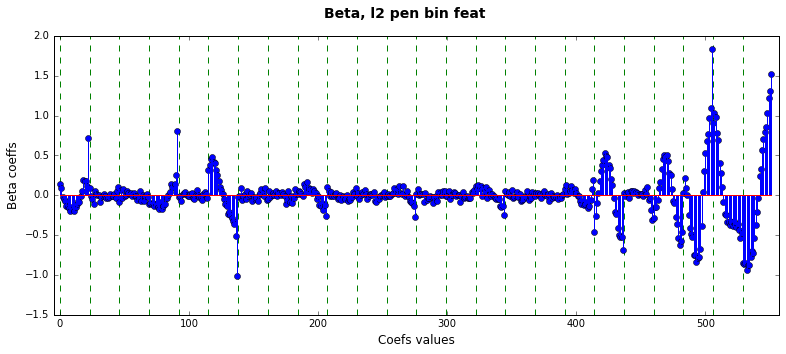

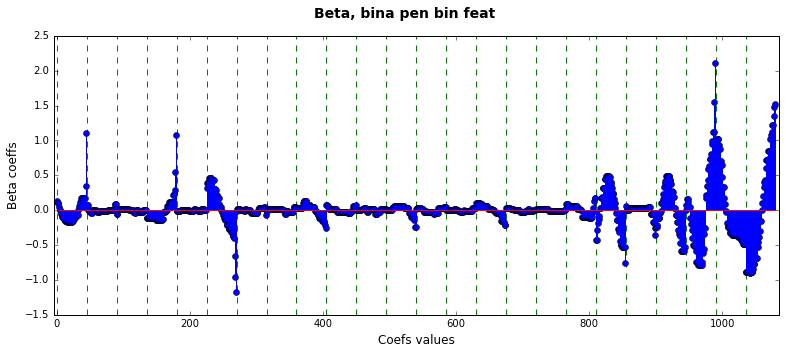

20 first selected features (bina pen bin feat):
+---------+------------+
| Feature |   Effect   |
+---------+------------+
|  25#45  | 1.31054 %  |
|  25#44  | 0.961814 % |
|  27#45  | 0.944618 % |
|  27#44  | 0.914294 % |
|  27#43  | 0.836988 % |
|  27#42  | 0.760079 % |
|  27#41  | 0.760079 % |
|   5#45  | 0.728093 % |
|  27#40  | 0.692062 % |
|  25#43  | 0.690163 % |
|  25#42  | 0.690163 % |
|   0#45  | 0.685896 % |
|   3#45  | 0.664732 % |
|  27#39  | 0.66347 %  |
|  27#38  | 0.631983 % |
|   26#5  | 0.629691 % |
|   26#4  | 0.629691 % |
|   26#3  | 0.629691 % |
|  25#41  | 0.614579 % |
|   26#2  | 0.601832 % |
|   26#1  | 0.601832 % |
+---------+------------+


In [4]:
for fname in os.listdir("./results/beta"):
    if fname[0] not in ['.', 'f', 'b']:
        coeffs = np.load("./results/beta/%s" % fname)
        model = fname.split('.')[0].split('-')[1]
        fig = pl.figure(figsize=(13,5))
        ax = fig.add_subplot(111)
        if(int(fname.split('-')[0]) > 2):
            blocks_start = np.load("./results/beta/blocks_start-%s.npy" % model)
            for val in blocks_start:
                ax.axvline(val, color='g', linestyle='--') 
        pl.suptitle("Beta, %s" % model.replace('_',' '), 
                    fontsize=14, fontweight="bold")
        pl.xlabel("Coefs values", fontsize=12)
        pl.ylabel("Beta coeffs", fontsize=12)
        ax.stem(coeffs)
        
        ax.set_xlim([-5, len(coeffs)+5])
        pl.show()

features_names = np.load("./results/beta/features_names_bina.npy")
nb_first_features = 20
idx_selected = [i for i, x in enumerate(coeffs != 0.) if x]
features_selected = [features_names[i] for i in  idx_selected]
norm1_coeff = np.linalg.norm(coeffs, ord=1)
val = [100 * abs(coeffs[i])/norm1_coeff for i in  idx_selected]
features_selected = pd.DataFrame({'Feature' : features_selected,
                                  'Effect' : val})
features_selected.sort_values(['Effect'], ascending=False, inplace=True)
features_selected.index = range(len(features_selected))
print("%s first selected features (bina pen bin feat):" % nb_first_features)
t = PrettyTable(['Feature', 'Effect']) 
for k,i in enumerate(range(len(features_selected))):
    if k<nb_first_features+1:
        t.add_row([features_selected.Feature[i], 
                   "%g %%" % features_selected.Effect[i]])
print(t)

### Learning curves

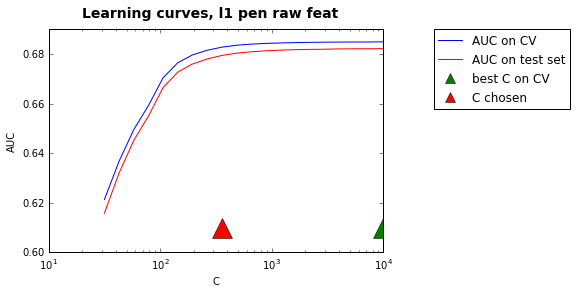

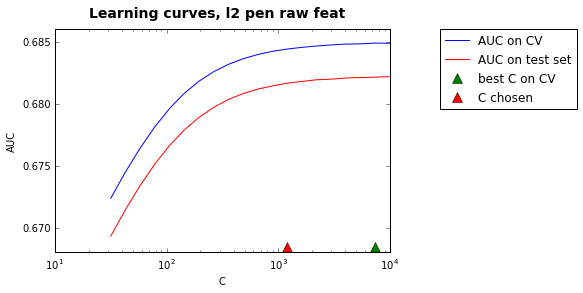

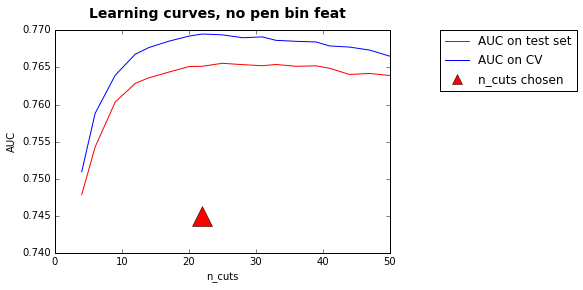

n_cuts_chosen=22.0
C_chosen=10000.0


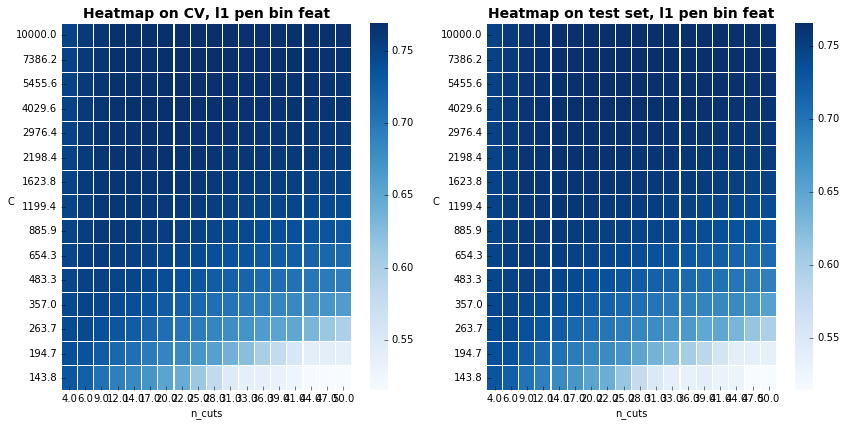

n_cuts_chosen=22.0
C_chosen=10000.0


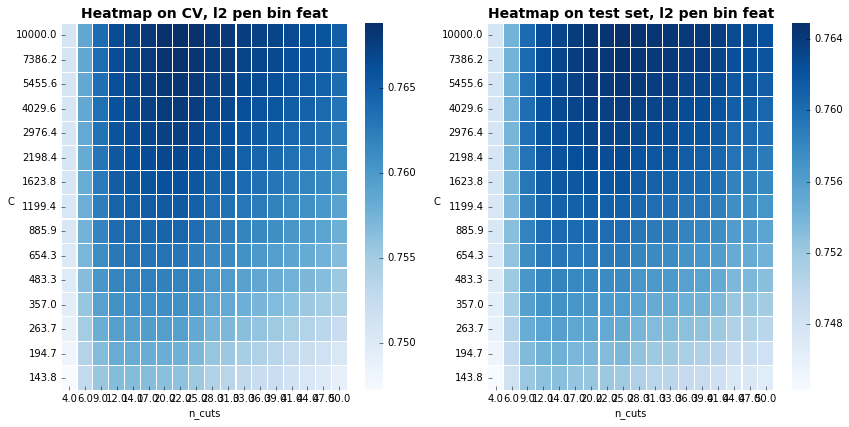

n_cuts_chosen=44.0
C_chosen=4029.6113202


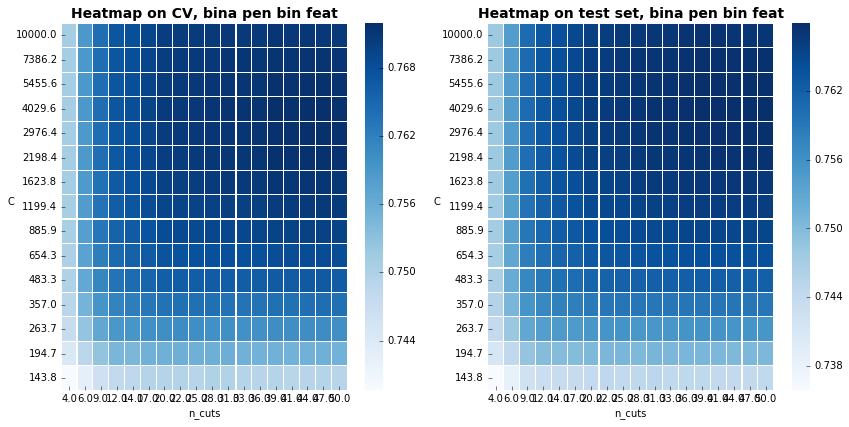

In [5]:
for fname in os.listdir("./results/learning_curves"):
    if fname[0] != '.':
        learning_curves = np.load("./results/learning_curves/" + str(fname))
        model_nb = fname.split('-')[0]
        fname_ = fname.split('.')[0].split('-')[1].replace('_',' ')  
            
        if int(model_nb) == 2:
            fig = pl.figure()
            ax = fig.add_subplot(111)
            C_grid = learning_curves[:, 0]
            C_grid_ = C_grid
            avg_scores = learning_curves[:, 1]
            score_test = learning_curves[:, 2]
            selection = fname.split('.')[0].split('selection_')[1]
            idx_best = np.unravel_index(avg_scores.argmax(), 
                                        avg_scores.shape)[0]
            C_best = C_grid[idx_best]
            if selection == 'min':
                C_chosen = C_best
            if selection == '1st':
                max_ = avg_scores.max()
                min_ = avg_scores.min()
                idx = [i for i, is_up in enumerate(
                    list(avg_scores >= max_ - .05 * (max_ - min_)))
                       if is_up]
                idx_chosen = min(idx) if len(idx) > 0 else idx_best
                C_chosen = C_grid[idx_chosen]
            
            pl.xscale('log')
            ax.plot(C_grid, avg_scores, label="AUC on CV")
            ax.plot(C_grid, score_test , '-r', 
                    label="AUC on test set")
            y_min = ax.get_ylim()[0]
            ax.plot(C_best,y_min,'g^',ms=20, label="best C on CV")
            ax.plot(C_chosen,y_min,'r^',ms=20, label="C chosen")
            pl.suptitle("Learning curves, %s" % fname_, 
                        fontsize=14, fontweight="bold")
            pl.xlabel("C")
            pl.ylabel("AUC")
            pl.legend(bbox_to_anchor=(1.15,1), loc=2, borderaxespad=0.,
                      numpoints=1, markerscale=.5)
            pl.show()
            
        if int(model_nb) == 3:
            fig = pl.figure()
            ax = fig.add_subplot(111)
            n_cuts_grid = learning_curves[:, 0]
            avg_scores = learning_curves[:, 1]
            score_test = learning_curves[:, 2]
            idx_best = np.unravel_index(avg_scores.argmax(), 
                                        avg_scores.shape)[0]
            n_cuts_chosen = n_cuts_grid[idx_best]
            ax.plot(n_cuts_grid, score_test , '-r', 
                    label = "AUC on test set")
            ax.plot(n_cuts_grid, avg_scores, label="AUC on CV")
            y_min = ax.get_ylim()[0]
            ax.plot(n_cuts_chosen,y_min,'r^',ms=20, 
                    label="n_cuts chosen")
            pl.suptitle("Learning curves, %s" % fname_, 
                        fontsize=14, fontweight="bold")
            pl.xlabel('n_cuts')
            pl.ylabel('AUC')
            pl.legend(bbox_to_anchor=(1.15,1), loc=2, borderaxespad=0., 
                      numpoints=1, markerscale=.5)
            pl.show()
            
        if int(model_nb) in [4, 5]:
            n_cuts_grid_size = int(learning_curves.shape[1]/2)
            avg_scores = learning_curves[:, :n_cuts_grid_size]
            score_test = learning_curves[:, n_cuts_grid_size:]
            fig = pl.figure(figsize=(12,6))
            
            id_C, id_n_cuts = np.where(avg_scores == avg_scores.max())
            C_chosen = C_grid[len(C_grid) - id_C[0] - 1]
            n_cuts_chosen = n_cuts_grid[id_n_cuts[0]]
            
            print("n_cuts_chosen=%s" % n_cuts_chosen)
            print("C_chosen=%s" % C_chosen)
            
            if True:
                lines2del = 5
                avg_scores = avg_scores[:-lines2del,:]
                score_test = score_test[:-lines2del,:]
                C_grid = C_grid_[lines2del:]
            
            
            
            for i,data in enumerate([avg_scores, score_test]):
                if i == 0:
                    add = 'CV'
                    ax = fig.add_subplot(121)
                else:
                    add = 'test set'
                    ax = fig.add_subplot(122)
                ax = sns.heatmap(data, cmap=pl.cm.Blues, linewidths=.1)
                pl.yticks(rotation=0)
                pl.title("Heatmap on %s, %s" % (add, fname_), 
                         fontsize=14, fontweight="bold")
                pl.xlabel('n_cuts')
                pl.ylabel('C', rotation=0)
                ax.set_xticklabels(n_cuts_grid, minor=False)
                ax.set_yticklabels(['%.1f' % C for C in C_grid], minor=False)
                ax.grid(False)
            pl.tight_layout()
            pl.show()            

## Final performances comparison

In [6]:
results = open("./results/results.txt", "r")
print(results.read())

+-------------------+----------+--------+
|       Algos       |   AUC    |  time  |
+-------------------+----------+--------+
|  no pen raw feat  | 0.682227 | 0.449  |
|  l2 pen raw feat  | 0.681622 | 0.367  |
|  l1 pen raw feat  | 0.679461 | 0.367  |
|  no pen bin feat  | 0.765148 | 11.000 |
|  l1 pen bin feat  | 0.765166 | 11.677 |
|  l2 pen bin feat  | 0.764489 | 9.692  |
| bina pen bin feat | 0.767834 | 56.021 |
+-------------------+----------+--------+
 global time: 65558.90033316612 s


## ROC curves

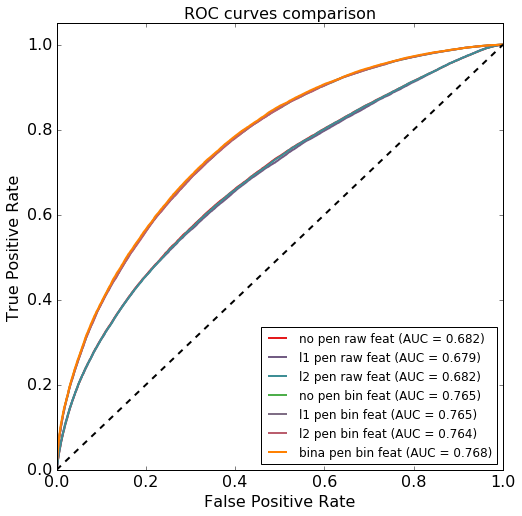

In [7]:
y_test = np.load('./results/y_test.npy')
lw = 2
color_list = pl.cm.Set1(np.linspace(0, .5, 7))
fig = pl.figure(figsize=(8,8))   
ax = fig.add_subplot(1,1,1)
i=0
for fname in os.listdir('./results/y_pred'):
    if fname[0] != '.':
        y_pred = np.load('./results/y_pred/' + str(fname))
        fname = fname.split('.')[0].split('-')[1].replace('_',' ')
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        pl.plot(fpr, tpr, color=color_list[i], lw=lw, 
                label = '%s (AUC = %0.3f)' % (fname, roc_auc))
        i+=1

pl.plot([0, 1], [0, 1], 'k--', lw=lw)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.tick_params(axis='both', which='major', labelsize=16)
pl.xlabel('False Positive Rate', fontsize=16)
pl.ylabel('True Positive Rate', fontsize=16)
pl.title('ROC curves comparison', fontsize=16)
pl.legend(loc="lower right")
pl.savefig('./results/roc_curves.pdf', bbox_inches='tight')
pl.show()